<a href="https://colab.research.google.com/github/shreyakudmethi/Deep-learning/blob/main/p4_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learned parameters (Gradient Descent): θ0 = 153.74, θ1 = 47.14


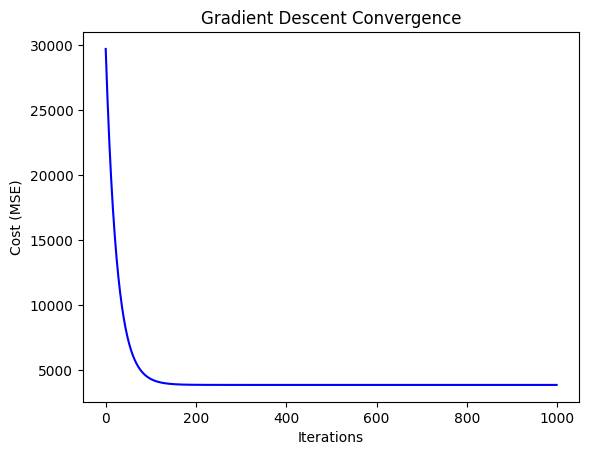

Test MSE (Gradient Descent): 4061.83
Parameters (Normal Equation): θ0 = 153.74, θ1 = 47.14
Test MSE (Normal Equation): 4061.83


In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
diabetes = load_diabetes()
X = diabetes.data[:, np.newaxis, 2]  # BMI feature
y = diabetes.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add intercept term
X_train_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

# Initialize parameters
theta = np.zeros(2)  # θ0 and θ1
learning_rate = 0.01
iterations = 1000
m = len(y_train)
cost_history = []

# Batch Gradient Descent
for i in range(iterations):
    predictions = X_train_b.dot(theta)
    errors = predictions - y_train
    gradients = (2/m) * X_train_b.T.dot(errors)
    theta -= learning_rate * gradients
    cost = (1/m) * np.sum(errors**2)
    cost_history.append(cost)

# Print learned parameters
print(f"Learned parameters (Gradient Descent): θ0 = {theta[0]:.2f}, θ1 = {theta[1]:.2f}")

# Plot cost vs iterations
plt.plot(range(iterations), cost_history, 'b-')
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Convergence")
plt.show()

# Evaluate model on test set
y_pred = X_test_b.dot(theta)
mse_test = np.mean((y_test - y_pred)**2)
print(f"Test MSE (Gradient Descent): {mse_test:.2f}")

# Compare with Normal Equation
theta_normal = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)
print(f"Parameters (Normal Equation): θ0 = {theta_normal[0]:.2f}, θ1 = {theta_normal[1]:.2f}")

y_pred_normal = X_test_b.dot(theta_normal)
mse_normal = np.mean((y_test - y_pred_normal)**2)
print(f"Test MSE (Normal Equation): {mse_normal:.2f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8596 - loss: 0.4751 - val_accuracy: 0.9566 - val_loss: 0.1405
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9674 - loss: 0.1131 - val_accuracy: 0.9647 - val_loss: 0.1188
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9772 - loss: 0.0756 - val_accuracy: 0.9694 - val_loss: 0.0999
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9834 - loss: 0.0541 - val_accuracy: 0.9747 - val_loss: 0.0877
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9872 - loss: 0.0431 - val_accuracy: 0.9709 - val_loss: 0.0974
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9891 - loss: 0.0348 - val_accuracy: 0.9747 - val_loss: 0.0949
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9914 - loss: 0.0265 - val_accuracy: 0.9740 - val_loss: 0.1007
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9926 - loss: 0.0212 

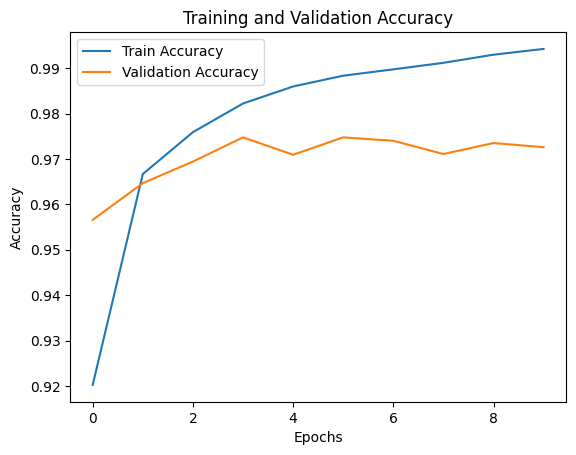

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


(X_train, y_train), (X_test, y_test) = mnist.load_data()


X_train = X_train / 255.0
X_test = X_test / 255.0


y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train_cat, epochs=10, batch_size=32,
                    validation_split=0.2)


test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
